# Data Preparation and Exploratory Analysis

Load dataset from Google Drive/local upload and perform comprehensive exploratory data analysis (EDA).

### Step 1: Upload or Mount Dataset

In [2]:
# Option 1: Upload directly
from google.colab import files

print('Choose upload method:')
print('1. Direct upload (paste below)')
print('2. Mount Google Drive')

# For direct upload:
# uploaded = files.upload()

# For Google Drive mount:
from google.colab import drive
drive.mount('/content/drive')

# Check files
import os
os.listdir('/content')

Choose upload method:
1. Direct upload (paste below)
2. Mount Google Drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', 'drive', 'sample_data']

### Step 2: Load Dataset

In [3]:
import pandas as pd
import numpy as np

# Load dataset - adjust path based on your upload method
df = pd.read_csv('/content/drive/MyDrive/isumenuka osteoporosis-risk-prediction/Data/osteoporosis_cleaned_reorganized.csv')
# OR if uploaded directly:
# df = pd.read_csv('osteoporosis_cleaned_reorganized.csv')

print('═' * 60)
print('DATASET LOADED SUCCESSFULLY')
print('═' * 60)
print(f'Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns')
print(f'\nFirst few records:')
print(df.head())

════════════════════════════════════════════════════════════
DATASET LOADED SUCCESSFULLY
════════════════════════════════════════════════════════════
Dataset shape: 1958 rows × 16 columns

First few records:
        Id  Age Gender Hormonal Changes Family History    Race/Ethnicity  \
0  1106829   18   Male           Normal            Yes  African American   
1  1107249   20   Male           Normal             No             Asian   
2  1109578   38   Male   Postmenopausal            Yes             Asian   
3  1109590   21   Male   Postmenopausal            Yes  African American   
4  1109782   21   Male           Normal            Yes             Asian   

   Body Weight Calcium Intake Vitamin D Intake Physical Activity Smoking  \
0  Underweight       Adequate     Insufficient            Active     Yes   
1       Normal       Adequate       Sufficient            Active     Yes   
2  Underweight       Adequate       Sufficient            Active     Yes   
3       Normal            Low  

### Step 3: Dataset Information

In [4]:
print('═' * 60)
print('DATASET INFORMATION')
print('═' * 60)
df.info()

print('\n' + '═' * 60)
print('STATISTICAL SUMMARY')
print('═' * 60)
print(df.describe())

════════════════════════════════════════════════════════════
DATASET INFORMATION
════════════════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications

### Step 4: Missing Values Analysis

In [5]:
print('═' * 60)
print('MISSING VALUES ANALYSIS')
print('═' * 60)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) == 0:
    print('✓ No missing values found!')
else:
    print(missing_df.to_string(index=False))

════════════════════════════════════════════════════════════
MISSING VALUES ANALYSIS
════════════════════════════════════════════════════════════
            Feature  Missing_Count  Missing_Percentage
Alcohol Consumption            988           50.459653
        Medications            985           50.306435
 Medical Conditions            647           33.043922


### Step 5: Target Variable Distribution

════════════════════════════════════════════════════════════
TARGET VARIABLE DISTRIBUTION
════════════════════════════════════════════════════════════
No Risk (0): 979 (50.0%)
Risk (1): 979 (50.0%)


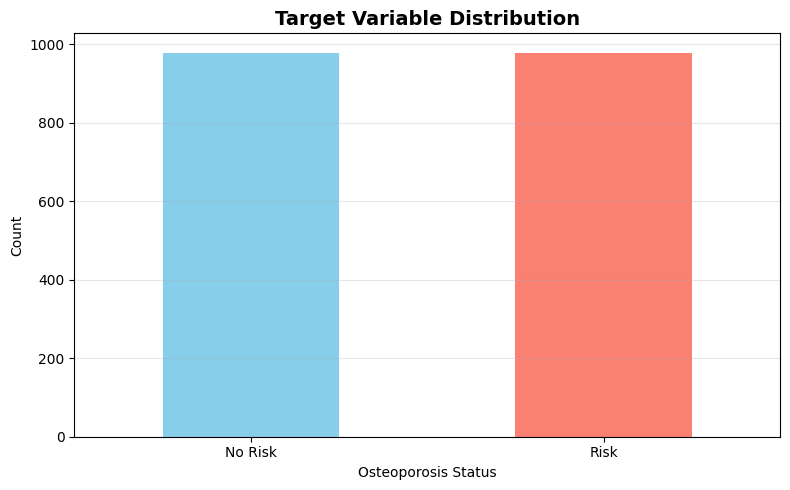

In [7]:
print('═' * 60)
print('TARGET VARIABLE DISTRIBUTION')
print('═' * 60)

target_counts = df['Osteoporosis'].value_counts()
print(f'No Risk (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)')
print(f'Risk (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)')

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
ax = target_counts.plot(kind='bar', color=['skyblue', 'salmon']) # Store the Axes object
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Osteoporosis Status')
plt.ylabel('Count')
ax.set_xticklabels(['No Risk', 'Risk'], rotation=0) # Use ax.set_xticklabels
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Step 6: Gender and Age Distribution

════════════════════════════════════════════════════════════
DEMOGRAPHIC ANALYSIS
════════════════════════════════════════════════════════════

Gender Distribution:
Gender
Male      992
Female    966
Name: count, dtype: int64

Age Statistics by Gender:
        count       mean        std   min   25%   50%   75%   max
Gender                                                           
Female  966.0  38.774327  21.232657  18.0  21.0  29.0  53.0  90.0
Male    992.0  39.419355  21.480227  18.0  21.0  33.0  54.0  90.0


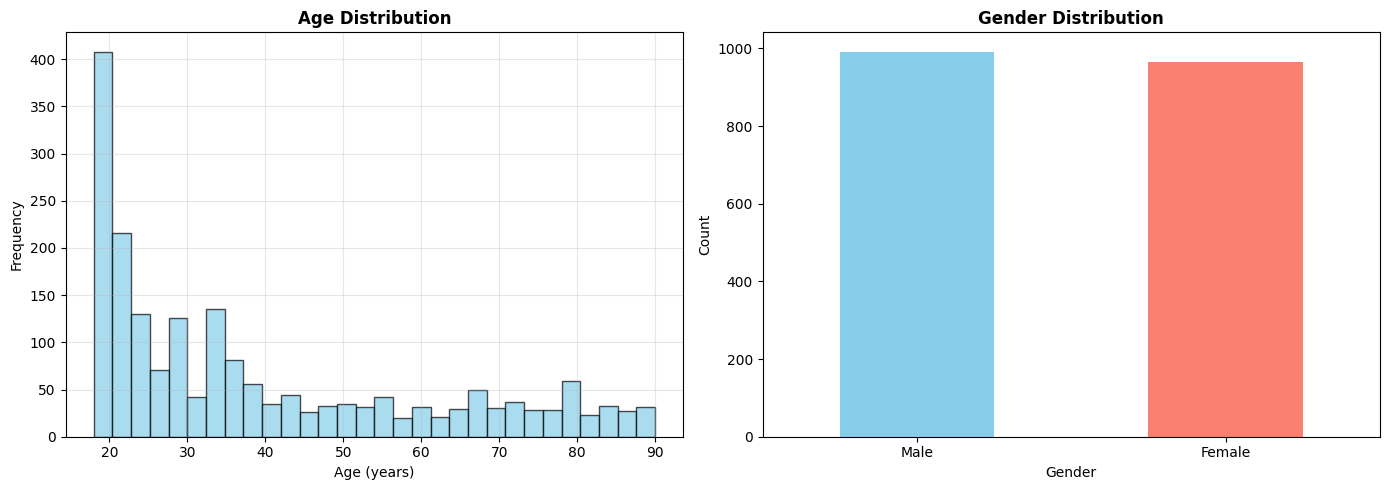

In [8]:
print('═' * 60)
print('DEMOGRAPHIC ANALYSIS')
print('═' * 60)

# Gender distribution
print('\nGender Distribution:')
print(df['Gender'].value_counts())

# Age statistics by gender
print('\nAge Statistics by Gender:')
print(df.groupby('Gender')['Age'].describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
axes[0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution', fontweight='bold')
axes[0].grid(alpha=0.3)

# Gender distribution
df['Gender'].value_counts().plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Gender Distribution', fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

### Step 7: Risk Distribution by Demographics

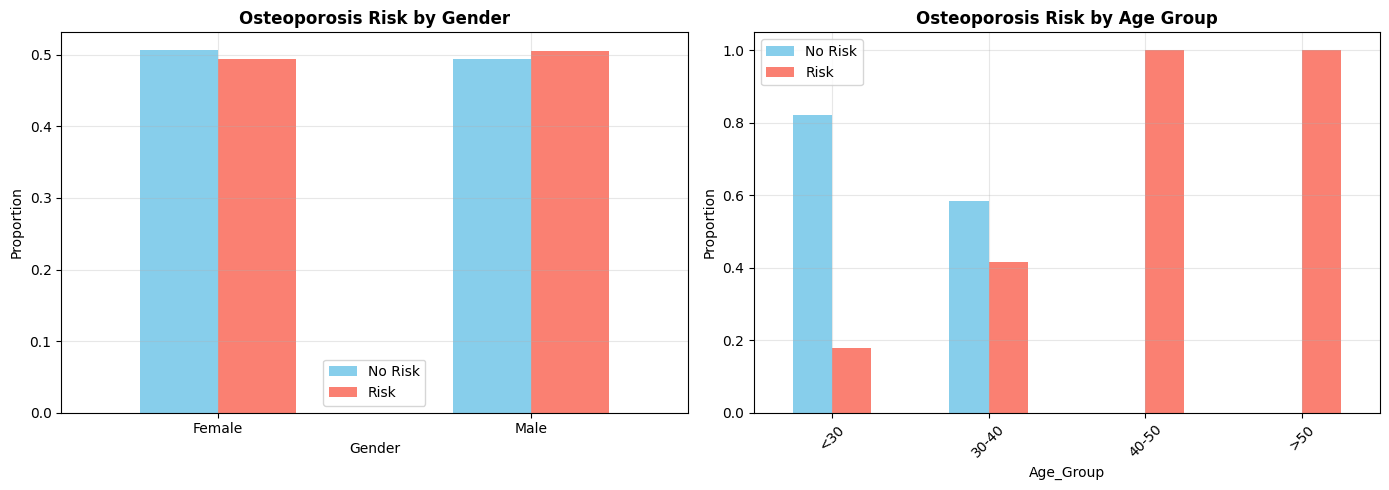

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Risk by gender
pd.crosstab(df['Gender'], df['Osteoporosis'], normalize='index').plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Osteoporosis Risk by Gender', fontweight='bold')
axes[0].set_ylabel('Proportion')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
axes[0].legend(['No Risk', 'Risk'])
axes[0].grid(alpha=0.3)

# Risk by age groups
age_bins = [0, 30, 40, 50, 100]
age_labels = ['<30', '30-40', '40-50', '>50']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

pd.crosstab(df['Age_Group'], df['Osteoporosis'], normalize='index').plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Osteoporosis Risk by Age Group', fontweight='bold')
axes[1].set_ylabel('Proportion')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].legend(['No Risk', 'Risk'])
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

df.drop('Age_Group', axis=1, inplace=True)

### Save Dataset for Next Steps

The dataset is now prepared for preprocessing in the next notebook.

In [11]:
import os

# Create the directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Save for next notebook
df.to_csv('data/dataset_loaded.csv', index=False)
print('✓ Dataset saved successfully!')
print('\nReady to proceed to Data Preprocessing notebook.')

✓ Dataset saved successfully!

Ready to proceed to Data Preprocessing notebook.


### Next Notebook

Proceed to **03_Data_Preprocessing.ipynb** to handle missing values, encode features, and prepare data for model training.